In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df=pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Univariate Analysis**

Categorical Data:

In [66]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [67]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [68]:
df['Sex'].value_counts(normalize=True)

,proportion
Sex,
male,0.647587
female,0.352413


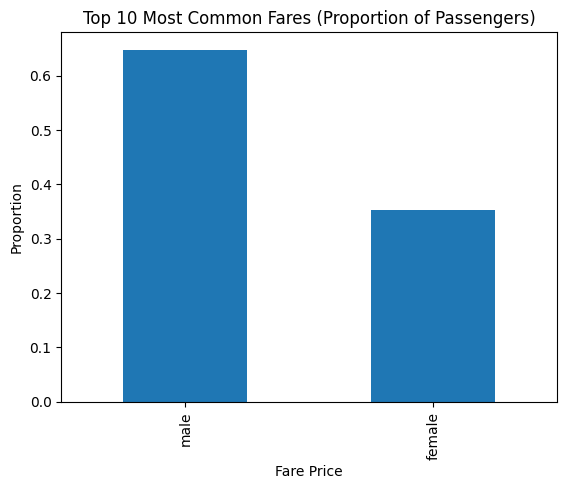

In [69]:
df['Sex'].value_counts(normalize=True).head(10).plot(kind='bar')
plt.title("Top 10 Most Common Fares (Proportion of Passengers)")
plt.xlabel("Fare Price")
plt.ylabel("Proportion")
plt.show()

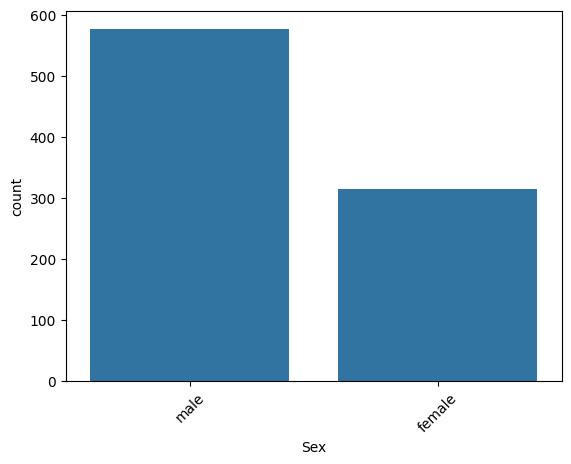

In [70]:
sns.countplot(x=df["Sex"])
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

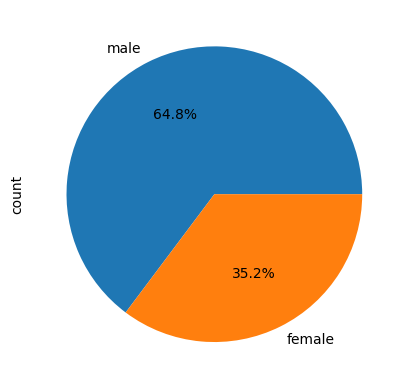

In [71]:
df["Sex"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.show()

Numerical Data:

In [72]:
df['Fare'].value_counts()

,count
Fare,
8.0500,43
13.0000,42
7.8958,38
7.7500,34
26.0000,31
...,...
35.0000,1
28.5000,1
6.2375,1


In [73]:
df['Fare'].value_counts(normalize=True)

,proportion
Fare,
8.0500,0.048260
13.0000,0.047138
7.8958,0.042649
7.7500,0.038159
26.0000,0.034792
...,...
35.0000,0.001122
28.5000,0.001122
6.2375,0.001122


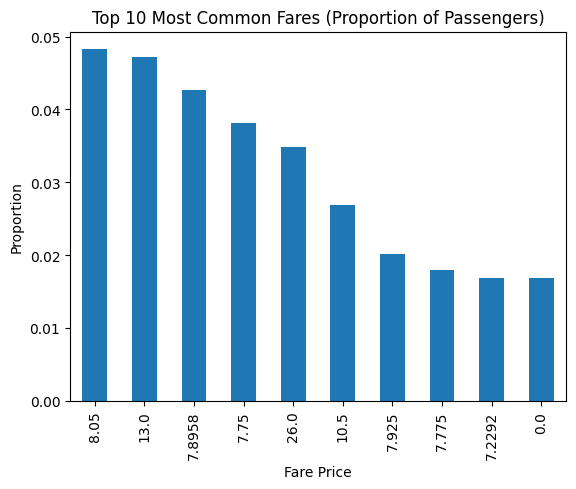

In [74]:
df['Fare'].value_counts(normalize=True).head(10).plot(kind='bar')
plt.title("Top 10 Most Common Fares (Proportion of Passengers)")
plt.xlabel("Fare Price")
plt.ylabel("Proportion")
plt.show()

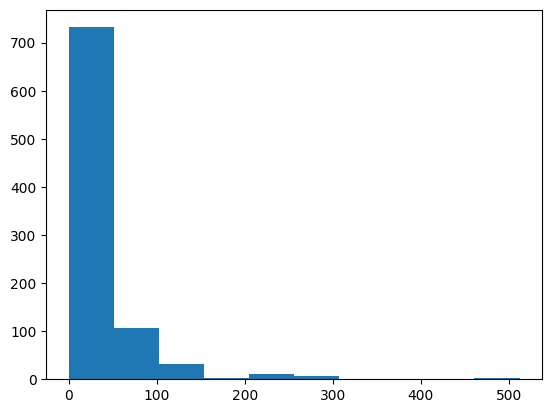

In [75]:
plt.hist(df["Fare"], bins=10)
plt.show()

<ipython-input-76-cf0334540b62>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


<Axes: xlabel='Age', ylabel='Density'>

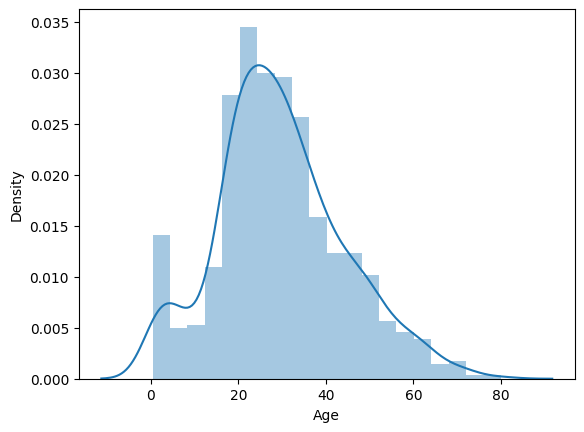

In [76]:
sns.distplot(df["Age"])

<Axes: ylabel='Age'>

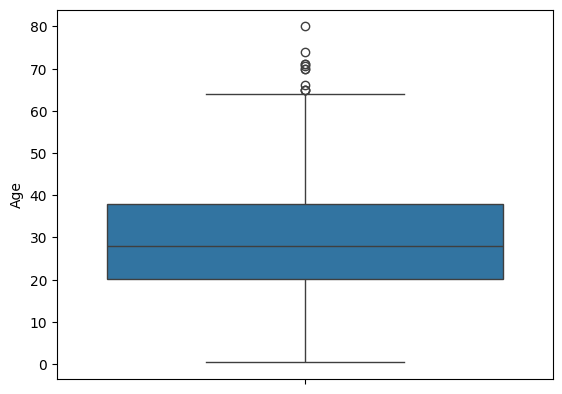

In [77]:
sns.boxplot(df["Age"])

In [78]:
# Konw Outliers of Column
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Age"] < lower_bound) | (df["Age"] > upper_bound)]
print(outliers)


     PassengerId  Survived  Pclass                                  Name  \
33            34         0       2                 Wheadon, Mr. Edward H   
54            55         0       1        Ostby, Mr. Engelhart Cornelius   
96            97         0       1             Goldschmidt, Mr. George B   
116          117         0       3                  Connors, Mr. Patrick   
280          281         0       3                      Duane, Mr. Frank   
456          457         0       1             Millet, Mr. Francis Davis   
493          494         0       1               Artagaveytia, Mr. Ramon   
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
672          673         0       2           Mitchell, Mr. Henry Michael   
745          746         0       1          Crosby, Capt. Edward Gifford   
851          852         0       3                   Svensson, Mr. Johan   

      Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
33   male  66.0    

In [79]:
#Drop ouliers from Column
indices_to_drop = [33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851]
df = df.drop(indices_to_drop)
df = df.reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,880.000000,880.000000,880.000000,703.000000,880.000000,880.000000,880.000000
mean,446.532955,0.387500,2.315909,29.072077,0.528409,0.384091,32.245439
std,256.923323,0.487456,0.833170,13.728478,1.108089,0.809624,49.941132
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.750000,0.000000,2.000000,20.000000,0.000000,0.000000,7.917700
50%,445.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.250000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,64.000000,8.000000,6.000000,512.329200


<Axes: ylabel='Age'>

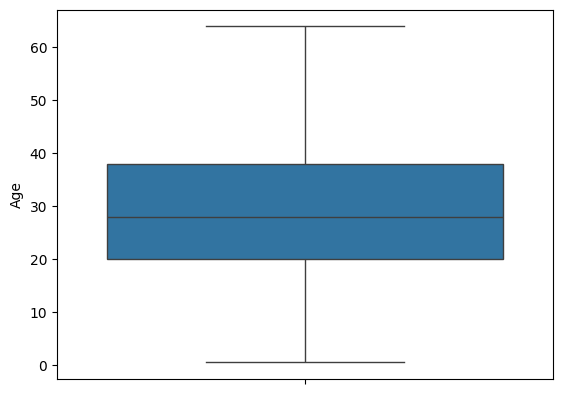

In [81]:
sns.boxplot(df["Age"])